In [52]:
from pydantic import BaseModel
from typing import List
import requests

class NERRequest(BaseModel):
    text: str

class Entity(BaseModel):
    entity: str
    score: float
    start: int
    end: int
    word: str

class NERResponse(BaseModel):
    entities: List[Entity]



## Single Request

In [53]:
NER_API_URL = "http://127.0.0.1:8000"

# URL of the FastAPI server
url = f"{NER_API_URL}/ner"

# Create an instance of NERRequest
request_data = NERRequest(text="Hello, world!") # Pick from PLOD-CW

# Convert the request data to a JSON string
request_json = request_data.json()

# Make the POST request
response = requests.post(url, data=request_json, headers={"Content-Type": "application/json"})


# Check if the request was successful
if response.status_code == 200:
    # Parse the response JSON to the NERResponse model
    ner_response = NERResponse(**response.json())
    print(ner_response)
else:
    print(f"Request failed with status code {response.status_code}")

entities=[Entity(entity='B-O', score=0.7138232588768005, start=0, end=5, word='Hello'), Entity(entity='B-O', score=0.8602567911148071, start=5, end=6, word=','), Entity(entity='B-O', score=0.7045656442642212, start=7, end=12, word='world'), Entity(entity='B-O', score=0.9600160717964172, start=12, end=13, word='!')]


## Single Request to /hello Endpoint

In [54]:
import requests

# URL of the FastAPI server
url = f"{NER_API_URL}/hello"

# Make the GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Print the response JSON
    print(response.json())
else:
    print(f"Request failed with status code {response.status_code}")

{'message': 'Hello, World!'}


## Multiple request to /ner endpoint

In [55]:
import threading
import time
import pandas as pd
from gradio_client import Client

# List to store the time taken for each request
times = []

# Lock to ensure thread-safe operations on the times list
lock = threading.Lock()

# Function to send a request to the API and measure time taken
def send_request():
    start_time = time.time()

    # Create an instance of NERRequest
    request_data = NERRequest(text="Hello, world!")

    # Convert the request data to a JSON string
    request_json = request_data.json()

    # Make the POST request
    response = requests.post(url, data=request_json, headers={"Content-Type": "application/json"})

    end_time = time.time()
    time_taken = end_time - start_time

    # Append the time taken to the list in a thread-safe manner
    with lock:
        times.append(time_taken)

# Number of concurrent requests
num_requests = 100

# Create threads
threads = []
for _ in range(num_requests):
    thread = threading.Thread(target=send_request)
    threads.append(thread)

# Start threads
for thread in threads:
    thread.start()

# Wait for all threads to complete
for thread in threads:
    thread.join()

# Create a pandas DataFrame with the times
df = pd.DataFrame(times, columns=["Time Taken"])

# Print the describe of the time distribution
print(df.describe())


       Time Taken
count  100.000000
mean     0.017934
std      0.008877
min      0.000000
25%      0.012228
50%      0.017015
75%      0.021086
max      0.047817


## Plot the distribution of times

In [56]:
df["Time Taken"]

0     0.020945
1     0.015174
2     0.008024
3     0.006214
4     0.012195
        ...   
95    0.011356
96    0.012191
97    0.013172
98    0.014342
99    0.016271
Name: Time Taken, Length: 100, dtype: float64

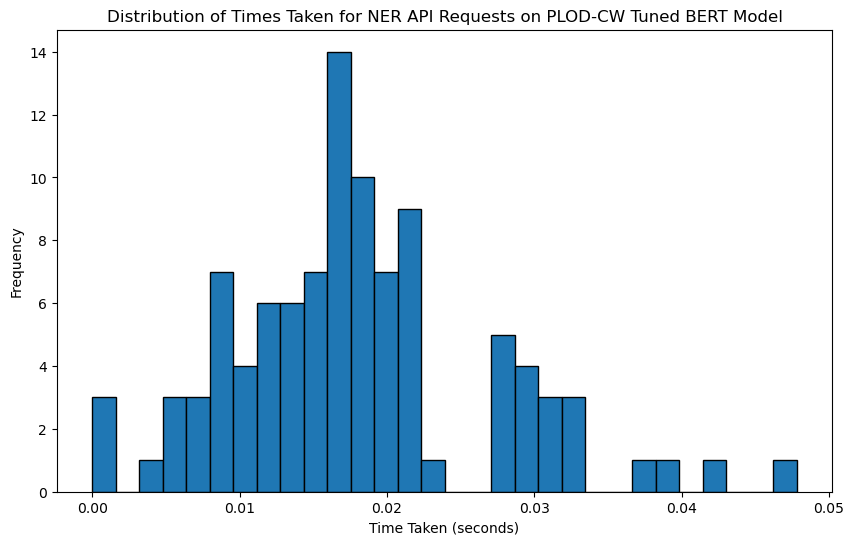

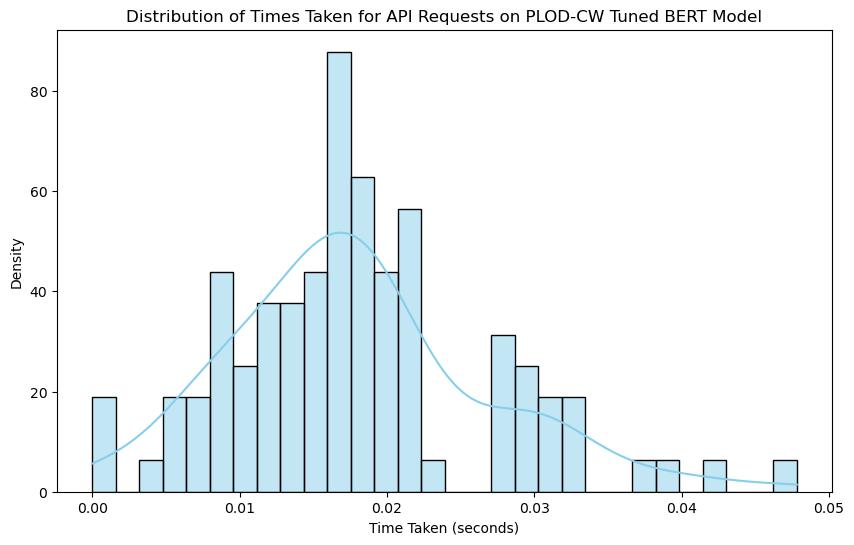

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the times taken
plt.figure(figsize=(10, 6))
plt.hist(times, bins=30, edgecolor='black')
plt.title("Distribution of Times Taken for NER API Requests on PLOD-CW Tuned BERT Model")
plt.xlabel("Time Taken (seconds)")
plt.ylabel("Frequency")
plt.show()

# Plot the KDE distribution and histogram of the times taken
# Plot the histogram and KDE distribution of the times taken
plt.figure(figsize=(10, 6))
sns.histplot(df["Time Taken"], kde=True, bins=30, color='skyblue', stat='density', edgecolor='black')
plt.title("Distribution of Times Taken for API Requests on PLOD-CW Tuned BERT Model")
plt.xlabel("Time Taken (seconds)")
plt.ylabel("Density")
plt.show()